# Prova 1 con cervello in verticale

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

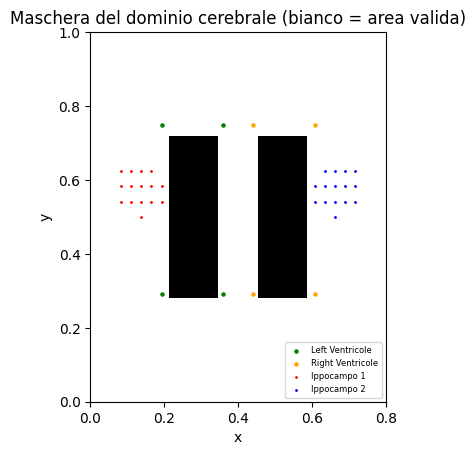

In [ ]:
### CREAZIONE DELLA GRIGLIA PER IL CERVELLO ###

Lx, Ly = 0.8, 1.0  # dimensioni del cervello
Nx, Ny = 30, 25  # punti della griglia
dx, dy = Lx / Nx, Ly/Ny  # passi spaziali


## Griglia di coordinate per il cervello ##
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

## Maschera del dominio cerebrale (1 = parte valida, 0 = ventricolo) ##
domain_mask = np.ones_like(X)

## Coordinate dei ventricoli ##

ven_low = 4*Ly/14
ven_up = Ly - ven_low  # prendiamo simmetrico

ven_left_left = 5*Lx/19
ven_left_right = 8*Lx/19
ven_right_left = Lx - ven_left_right  # prendiamo simmetrico
ven_right_right = Lx - ven_left_left  # prendiamo simmetrico

ventricle1 = ((X > ven_left_left) & (X < ven_left_right) & (Y > ven_low) & (Y < ven_up))
ventricle2 = ((X > ven_right_left) & (X < ven_right_right) & (Y > ven_low) & (Y < ven_up))

## Creo anche gli indici del reticolo che corrispondono ai ventricoli ##

# Lato in basso a sinistra
i_left_left = int(ven_left_left / dx)
i_left_right = int(ven_left_right / dx) + 1
i_right_left = int(ven_right_left / dx) - 1
i_right_right = int(ven_right_right / dx)
j_low = int(ven_low / dy)
j_up = int(ven_up / dy) + 1


## Coordinate degli ippocampi ##

# Modellizziamo gli ippocampi come delle circonferenze

x_hip_left = 3*Lx/18
x_hip_right = Lx - x_hip_left  # prendiamo simmetrico
y_hip = 8*Ly/14
radius_hipp = 0.075

hippo1 = (X - x_hip_left)**2 + (Y - y_hip)**2 < radius_hipp**2
hippo2 = (X - x_hip_right)**2 + (Y - y_hip)**2 < radius_hipp**2

# Applica i buchi (ventricoli)
# Operazione di maschera booleana combinata

domain_mask[ventricle1 | ventricle2] = 0

### CSF ###
i1_csf = int(Nx * Lx / 5)
i2_csf = Nx - i1_csf
j1_csf = Ny - int(Ny * Ly / 6)

## Visualizza la griglia ##

plt.figure()
plt.imshow(domain_mask, origin='lower', extent=[0, Lx, 0, Ly], cmap='gray')
plt.scatter(x[i_left_left], y[j_low], color = 'green', s = 5, label = "Left Ventricole")
plt.scatter(x[i_left_left], y[j_up], color = 'green', s = 5)
plt.scatter(x[i_left_right], y[j_low], color = 'green', s = 5)
plt.scatter(x[i_left_right], y[j_up], color = 'green', s = 5)
plt.scatter(x[i_right_left], y[j_low], color = 'orange', s = 5, label = "Right Ventricole")
plt.scatter(x[i_right_left], y[j_up], color = 'orange', s = 5)
plt.scatter(x[i_right_right], y[j_low], color = 'orange', s = 5)
plt.scatter(x[i_right_right], y[j_up], color = 'orange', s = 5)
plt.title("Maschera del dominio cerebrale (bianco = area valida)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(False)
plt.scatter(X[hippo1], Y[hippo1], color='red', s=1, label="Ippocampo 1")
plt.scatter(X[hippo2], Y[hippo2], color='blue', s=1, label="Ippocampo 2")
plt.legend(loc = "lower right", fontsize = 6)
plt.show()


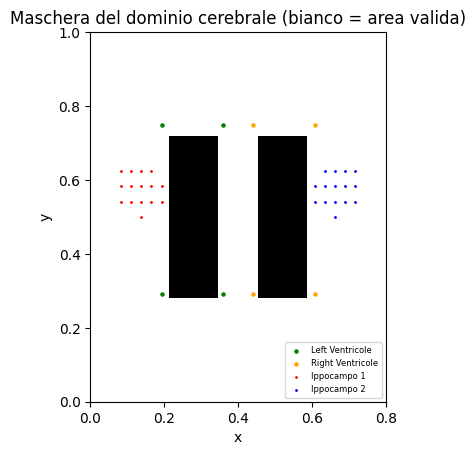

In [ ]:
### CREAZIONE DELLE REGIONI TRIANGOLARI ###

# Modellizziamo gli ippocampi come delle circonferenze

x_left = 1/3 * Lx
x_right = Lx - x_left
reg1 = (Y > 0.003 * (X - x_left)**6) & (Y < 0.55*(X - x_left)**2) & (X < x_left)
reg2 = (Y > 0.003 * (X - x_right)**6) & (Y < 0.55*(X - x_right)**2) & (X > x_right)

plt.figure()
plt.imshow(domain_mask, origin='lower', extent=[0, Lx, 0, Ly], cmap='gray')
plt.scatter(x[i_left_left], y[j_low], color = 'green', s = 5, label = "Left Ventricole")
plt.scatter(x[i_left_left], y[j_up], color = 'green', s = 5)
plt.scatter(x[i_left_right], y[j_low], color = 'green', s = 5)
plt.scatter(x[i_left_right], y[j_up], color = 'green', s = 5)
plt.scatter(x[i_right_left], y[j_low], color = 'orange', s = 5, label = "Right Ventricole")
plt.scatter(x[i_right_left], y[j_up], color = 'orange', s = 5)
plt.scatter(x[i_right_right], y[j_low], color = 'orange', s = 5)
plt.scatter(x[i_right_right], y[j_up], color = 'orange', s = 5)
plt.title("Maschera del dominio cerebrale (bianco = area valida)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(False)
plt.scatter(X[hippo1], Y[hippo1], color='red', s=1, label="Ippocampo 1")
plt.scatter(X[hippo2], Y[hippo2], color='blue', s=1, label="Ippocampo 2")
plt.scatter(X[reg1], Y[reg1], color = "orange", s = 1)
plt.scatter(X[reg2], Y[reg2], color = "orange", s = 1)
plt.legend(loc = "lower right", fontsize = 6)
plt.show()

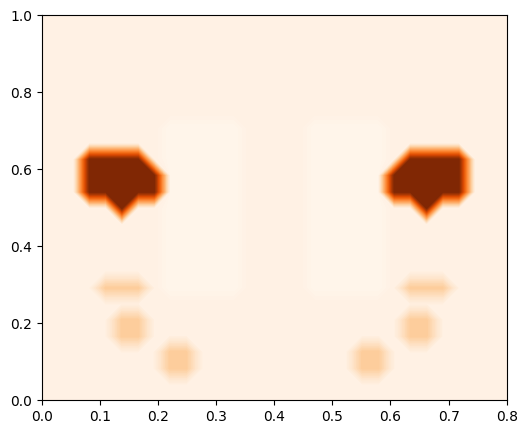

In [ ]:
## PROBABILITY DISTRIBUTIONS ##

# Supponiamo sia costante nel tempo e concentrata nell'ippocampo
chi = np.zeros((Ny, Nx))
chi[domain_mask == 1] = 1e-2
chi[hippo1] = 1/4
chi[hippo2] = 1/4
# chi[reg1] = 1/50
# chi[reg2] = 1/50

## Modellizziamo le altre sources come delle circonferenze

## Source 1
x_source1_left = 3*Lx/18
x_source1_right = Lx - x_source1_left  # prendiamo simmetrico
y_source1 = 4*Ly/14
radius_source = 0.035

source1_left = (X - x_source1_left)**2 + (Y - y_source1)**2 < radius_source**2
source1_right = (X - x_source1_right)**2 + (Y - y_source1)**2 < radius_source**2

chi[source1_left] = 1/15
chi[source1_right] = 1/15

## Source 2
x_source2_left = 4*Lx/21
x_source2_right = Lx - x_source2_left  # prendiamo simmetrico
y_source2 = 2.5*Ly/14
radius_source = 0.035

source2_left = (X - x_source2_left)**2 + (Y - y_source2)**2 < radius_source**2
source2_right = (X - x_source2_right)**2 + (Y - y_source2)**2 < radius_source**2

chi[source2_left] = 1/15
chi[source2_right] = 1/15

## Source 2
x_source3_left = 6*Lx/21
x_source3_right = Lx - x_source3_left  # prendiamo simmetrico
y_source3 = 1.5*Ly/14
radius_source = 0.035

source3_left = (X - x_source3_left)**2 + (Y - y_source3)**2 < radius_source**2
source3_right = (X - x_source3_right)**2 + (Y - y_source3)**2 < radius_source**2

chi[source3_left] = 1/15
chi[source3_right] = 1/15


plt.figure(figsize=(6,5))
plt.contourf(X, Y, chi, levels = 100, cmap = "Oranges")
plt.show()

In [ ]:
def plot_risultati(u, malfunc_dist, phi, phi_glob, U_N, f, Na, U_S,
                   n = -1, plot = False, isomer_steps = [0, 1, 5, 10, 20, 30, 40, 42, -1]):

    ## PLOT ALCUNE u_n ##
    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    fig.suptitle("Concentration for different isomers", fontsize=14)

    for ax, t in zip(axs.flat, isomer_steps):
        t_eff = t if t != -1 else u.shape[0] - 1
        data = np.ma.masked_where(domain_mask == 0, u[t_eff, :, :])
        cont = ax.contourf(X, Y, data, levels=100, cmap='PuOr')
        fig.colorbar(cont, ax=ax, label=f"Concentration of $u_{{{t_eff}}}$")
        ax.set_title(f"$u_{{{t_eff}}}$")

    plt.tight_layout()
    if plot:
        plt.savefig("Concentrazioni isomeri")
    plt.show()

    ## ALTRI PLOT UTILI ##
    fig, ((ax1, ax2), (ax3, ax4), (ax6, ax5)) = plt.subplots(3, 2, figsize=(12, 15))
    fig.suptitle("Some useful quantities", fontsize=14)

    data_malfunc = np.ma.masked_where(domain_mask == 0, malfunc_dist[n, :, :])
    cont1 = ax1.contourf(X, Y, data_malfunc, levels=100, cmap='RdYlBu')
    fig.colorbar(cont1, ax=ax1, label="Neuron Malfunctioning")
    ax1.set_title("Distribution of Neuron Malfunctioning")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")

    data_phi = np.ma.masked_where(domain_mask == 0, phi[n, :, :])
    cont2 = ax2.contourf(X, Y, data_phi, levels=50, cmap='RdYlBu')
    fig.colorbar(cont2, ax=ax2, label="Local Brain Atrophy")
    ax2.set_title("Local Brain Atrophy")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    ax3.plot(phi_glob[:n])
    ax3.set_title("Global Brain Atrophy")
    ax3.set_xlabel("Time")
    ax3.set_ylabel("Φ_global")

    ax4.plot(U_N[:n])
    ax4.set_title("Global average quantity of Ab")
    ax4.set_xlabel("Time")
    ax4.set_ylabel("U_N")

    ax6.plot(U_S[:n])
    ax6.set_title("CSF AB")
    ax6.set_xlabel("Time")
    ax6.set_ylabel("U_S")

    if n != 0:
        phi_max = np.max(phi_glob[5:n])
        phi_min = np.min(phi_glob[5:n])
        UN_max = np.max(U_N[5:n])
        UN_min = np.min(U_N[5:n])
        US_max = np.max(U_S[5:n])
        US_min = np.min(U_S[5:n])
        phi_scaled = (phi_glob[5:n] - phi_min) / (phi_max - phi_min)
        US_scaled = (U_S[5:n] - US_min) / (US_max - US_min)
        UN_scaled = (U_N[5:n] - UN_min) / (UN_max - UN_min)
        ax5.plot(UN_scaled, color="blue", label="AB deposits")
        ax5.plot(US_scaled, color="purple", label="CSF AB")
        ax5.plot(phi_scaled, color="red", label="Global avg AB")
        ax5.legend(loc="best")
        ax5.set_title("Scaled quantities")

        ## PLOT MA FATTO DA SOLO ##
        plt.figure(figsize=(6,5))
        plt.plot(UN_scaled, color="blue", label="AB deposits")
        plt.plot(US_scaled, color="purple", label="CSF AB")
        plt.plot(phi_scaled, color="red", label="Global avg AB")
        plt.legend(loc="best")
        plt.title("Scaled quantities")
        plt.tight_layout()
        if plot:
            plt.savefig("3 Mappe Insieme")
        plt.show()

    plt.tight_layout()
    if plot:
        plt.savefig("Mappe globali")
    plt.show()


    ## MAPPA DI a MASSIMO ##
    a_idx_max = np.argmax(f, axis=2)
    da = 1 / Na
    a_vals = np.linspace(da, 1 - da, Na)
    a_map = a_vals[a_idx_max]
    a_map_masked = np.ma.masked_where(domain_mask == 0, a_map)

    plt.figure(figsize=(6, 5))
    plt.contourf(X, Y, a_map_masked, levels=50, cmap='RdYlBu')
    plt.colorbar(label="Value of f")
    plt.title("Value of a for Max Local Brain Atrophy")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    if plot:
        plt.savefig("Mappa di f")
    plt.show()

    f_masked_last = np.ma.masked_where(domain_mask == 0, f[:, :, -1])
    plt.figure(figsize=(6, 5))
    plt.contourf(X, Y, f_masked_last, levels=250, cmap="RdYlBu")
    plt.colorbar(label="Value of a (max atrophy)")
    plt.title("Value of f when a = 1")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    if plot:
        plt.savefig("Mappa di f in 1")
    plt.show()

    fig, axs = plt.subplots(3, 3, figsize=(12, 10))
    fig.suptitle("Concentration of f for different values", fontsize=14)

    f_steps = [0, 1, 2, 3, 4, 5, 6, 7, -1]
    for ax, t in zip(axs.flat, f_steps):
        t_eff = t if t != -1 else Na - 1
        f_data = np.ma.masked_where(domain_mask == 0, f[:, :, t_eff])
        cont = ax.contourf(X, Y, f_data, levels=250, cmap='RdYlBu')
        fig.colorbar(cont, ax=ax, label="Value of f")
        ax.set_title(f"Map of f when a = {t_eff/Na}")

    plt.tight_layout()
    if plot:
        plt.savefig("Mappe di f")
    plt.show()


In [ ]:
### Robin Boundary Conditions ###

def update_ventricles_or(i1, i2, u, N, malfunc_dist,
                         phi, phi_glob, U_N, A_0, a,
                         f, n, epsilon, beta, diff):

    """
    Parametri:
    - i1, i2: indici della parte sx e dx del ventricolo
    """

    for i in range(i1+1, i2):

        ## Lower part of the ventricole ##
        u[:-1, j_low, i] = u[:-1, j_low-1, i] / (1 + epsilon*beta*dy / diff[:-1])

        ## Upper part of the ventricole ##
        u[:-1, j_up-1, i] = u[:-1, j_up, i] / (1 + epsilon*beta*dy / diff[:-1])

        ## UPDATE OF THE FUNCTIONS ##
        ## Neuron Malfunctioning

        malfunc_dist[n, j_low, i] = np.dot(a, f[j_low-1, i, :])
        malfunc_dist[n, j_up-1, i] = np.dot(a, f[j_up, i, :])

        ## Local and Global Brain Atrophy

        phi[n, j_low, i] = max(0, (malfunc_dist[n, j_low-1, i] - A_0)/((1 - A_0)))
        phi_glob[n] += phi[n, j_low, i]*dx*dy

        phi[n, j_up-1, i] = max(0, (malfunc_dist[n, j_up, i] - A_0)/((1 - A_0)))
        phi_glob[n] += phi[n, j_up-1, i]*dx*dy

        ## Average quantity of brain AB deposits

        U_N[n] += N * u[-1, j_low, i] * dx * dy
        U_N[n] += N * u[-1, j_up-1, i] * dx * dy


def update_ventricles_ver(i1, i2, u, N, malfunc_dist,
                         phi, phi_glob, U_N, A_0, a,
                         f, n, epsilon, beta, diff):

    for j in range(j_low, j_up):

        u[:-1, j, i1+1] = u[:-1, j, i1] / (1 + epsilon*beta*dx / diff[:-1])
        u[:-1, j, i2-1] = u[:-1, j, i2] / (1 + epsilon*beta*dx / diff[:-1])

        ## UPDATE ##

        # Neuron Malfunctioning
        malfunc_dist[n, j, i1+1] = np.dot(a, f[j, i1, :])
        malfunc_dist[n, j, i2-1] = np.dot(a, f[j, i2, :])

        # Local and Global Brain Atrophy
        phi[n, j, i1+1] = max(0, (malfunc_dist[n, j, i1+1] - A_0)/((1 - A_0)))
        phi_glob[n] += phi[n, j, i1+1]*dx*dy

        phi[n, j, i2-1] = max(0, (malfunc_dist[n, j, i2-1] - A_0)/((1 - A_0)))
        phi_glob[n] += phi[n, j, i2-1]*dx*dy

        # Average qty of AB deposit
        U_N[n] += N * u[-1, j, i1+1] * dx * dy
        U_N[n] += N * u[-1, j, i2-1] * dx * dy



def robin_bc(u, N, malfunc_dist, phi, phi_glob, U_N, A_0, a, f, n, epsilon, beta, diff):

    update_ventricles_or(i_left_left, i_left_right, u, N, malfunc_dist,
                         phi, phi_glob, U_N, A_0, a,
                         f, n, epsilon, beta, diff)

    update_ventricles_or(i_right_left, i_right_right, u, N, malfunc_dist,
                         phi, phi_glob, U_N, A_0, a,
                         f, n, epsilon, beta, diff)

    update_ventricles_ver(i_left_left, i_left_right, u, N, malfunc_dist,
                         phi, phi_glob, U_N, A_0, a,
                         f, n, epsilon, beta, diff)

    update_ventricles_ver(i_right_left, i_right_right, u, N, malfunc_dist,
                         phi, phi_glob, U_N, A_0, a,
                         f, n, epsilon, beta, diff)


In [ ]:
## Creazione dei coefficienti di diffusione ##

# Parametri
N = 50        # numero di specie oligomeriche (m = 1,...,N)
d1 = 0.01     # diffusività dei monomeri
r = 1/3        # esponente di decadimento

# Diffusività per ogni specie: d_m = d1 / m^r
diff = np.array([d1 / (m+1)**r for m in range(N)])

# Le placche (u_N) sono immobili
diff[-1] = 0.0

## Creazione dei coefficienti di rimozione della microglia ##
sigma = np.zeros(N)
sigma[0] = 0.005


In [ ]:
## PROVA DI FUNZIONE PER SIMULARE ##

def sim_stochastic(N = 50, T = 1, dt = 0.01, epsilon = 0.01, diff = diff, sigma = sigma, alpha = 10,
                   Na = 100, time_save = [100], u0 = 0.01, increm = 0.2, A_0 = 0.005001, beta = 0.01,
                   f0 = 0.001, C_g = 0.1, C_S = 0.001, C_f = 10, r_0 = 0.0,
                   U_bar = 0.1, mu_0 = 0.01, eta = 1, chi = chi, plot = True, plot_time = 500,
                   isomer_steps = [0, 1, 5, 10, 20, 30, 40, 42, -1]):

    """
    Funzione per simulare i dati

    Parametri:
    - N: numero di isomeri di proteine che consideriamo
    - T: tempo finale
    - dt: time step
    - epsilon: time-scale
    - diff: vettore dei coefficienti di diffusione
    - sigma: microglia removal
    - alpha: coefficiente di aggregazione
    - Na: numero di punti per dicretizzare [0,1]
    - time_save: lista con i tempi in cui vogliamo salvare i nostri risultati
    - u0: valore di fondo per i monomeri (u1)
    - increm: incremento da tenere nell'ippocampo
    - A0: threshold per la funzione phi
    - beta: costante per la rimozione di AB through choroid plexus (Robin BC)
    - f0: costante per valore iniziale della funzione f
    - C_g: costante per deterioration rate (funzione G)
    - C_S: costante per termine S nel deterioration rate
    - C_f:
    - r_0:
    - U_bar: minimal amount of AB to damage neurons (deterioration rate)
    - mu_0: parametro per F_cal
    - eta: costante per la parte stocastica
    - chi: jump distribution per la parte stocastica
    - plot: se TRUE stampa i risultati ogni plot_time tempi di iterazione
    - plot_time: ogni quanto stampare i risultati intermedi
    - isomer_steps: isomeri che vogliamo plottare

    Output:
    - u: vettore contenente le concentrazioni finali degli isomeri
    - malfunc_dist: macroscopic distribution of neuron malfunctioning
    - phi: local brain atrophy
    - phi_glob: global brain atrophy
    - U_N: average quantity of AB deposits
    - f: fraction of malfunctioning neurons
    - u_intermedie: valori di u ai tempi nel vettore time_save (solo se time_save non nullo)
    - f_intermedie: valori di f ai tempi nel vettore time_save (solo se time_save non nullo)

    """

    ## Check on the first CFL1 (on time step dt)

    CFL1 = epsilon * min(dx**2, dy**2) / (4 * max(diff))

    if dt > CFL1:
        print(CFL1)
        raise ValueError("Time step does not satisy the CFL condition. \n Please insert a smaller time step.")

    ### CREAZIONE DI VARIABILI BASE ###

    ## Creiamo il vettore per Na ##

    da = 1 / Na
    a = np.linspace(da, 1 - da, Na)

    time_steps = int(T/dt)

    ## Creiamo i coefficienti di agglomerazione ##

    A = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            A[i,j] = alpha / ((i+1)*(j+1))

    A[-1, -1] = 0   # Di solito si mette A(n,n) pari a 0 (pagina 4 paper)

    ## INIZIALIZZAMO GLU u_m ##

    # Per il vettore u creiamo un array con dimensioni:
    # - N: numero di isomeri
    # - Ny, Nx: perchè usiamo le stesse dimensioni del meshgrid di NumPy
    #           (lungo le righe abbiamo le coordinate di x e lungo le colonne
    #            le coordinate di y)

    u = np.zeros((N, Ny, Nx))

    ## INIZIALIZZAZIONE DI u_1 ##

    # Valore di fondo per i monomeri (u1)
    u[0, :, :] = u0

    # Incremento localizzato nei due ippocampi (solo in u1)

    u[0][hippo1] += increm
    u[0][hippo2] += increm
    u[0][source1_left] += 0.2*increm
    u[0][source2_left] += 0.2*increm
    u[0][source3_left] += 0.2*increm
    u[0][source1_right] += 0.2*increm
    u[0][source2_right] += 0.2*increm
    u[0][source3_right] += 0.2*increm
    u[0][0,0] = 0
    u[0][0,-1] = 0
    u[0][-1,0] = 0
    u[0][-1,-1] = 0

    # Azzeriamo tutto nei ventricoli (per ogni specie)
    for m in range(N):
        u[m] *= domain_mask

    ## Creazione delle funzioni f, nu, F_cal

    # Usiamo ancora le coordinate come nel meshgrid
    # Ignoriamo la dipendenza dal tempo (aggiorneremo tutto dopo)

    f = np.ones((Ny, Nx, Na))
    f *= f0 / Na
    f[:, :, 0] = 1 - (Na-1) * f0 / Na

    ## Dobbiamo aumentare leggermente nell'ippocampo
    f[hippo1, :] = 10 * f0/Na
    f[hippo1, 0] = 1 - (Na-1) * 10 * f0/Na

    f[hippo2, :] = 10 * f0/Na
    f[hippo2, 0] = 1 - (Na-1) * 10 * f0/Na

    ## Anche nelle altre sources
    f[source1_left, :] = 5 * f0/Na
    f[source1_left, 0] = 1 - (Na-1) * 5 * f0/Na

    f[source1_right, :] = 5 * f0/Na
    f[source1_right, 0] = 1 - (Na-1) * 5 * f0/Na

    f[source2_left, :] = 5 * f0/Na
    f[source2_left, 0] = 1 - (Na-1) * 5 * f0/Na

    f[source2_right, :] = 5 * f0/Na
    f[source2_right, 0] = 1 - (Na-1) * 5 * f0/Na

    f[source3_left, :] = 5 * f0/Na
    f[source3_left, 0] = 1 - (Na-1) * 5 * f0/Na

    f[source3_right, :] = 5 * f0/Na
    f[source3_right, 0] = 1 - (Na-1) * 5 * f0/Na


    np.random.seed(1234)
    #f = f + np.abs(np.random.normal(0, 0.0001, (Ny, Nx, Na)))  # add some noise
    f[domain_mask == 0, :] = 0
    nu = np.zeros((Ny, Nx, Na))
    nu_max = 0  # Variablie per salvare il nu max (serve per controllare CFL2)

    ## Update of nu ##
    for i in range(1, Nx -1):
        for j in range(1, Ny -1):
            for k in range(1, Na-1):
                diff_a = np.maximum(a - a[k], 0)
                sum1_nu = C_g * da * np.sum(diff_a * f[j, i, :])

                span = np.arange(1, N)  # aumento di 1 per avere la somma giusta
                sum2_nu = np.dot(span, u[:-1, j, i])

                nu[j, i, k] = sum1_nu + C_S*(1 - a[k])*max(sum2_nu - U_bar, 0)

                if nu[j,i,k] > nu_max:
                    nu_max = nu[j,i,k]

                    ## Calcoliamo la seconda condizione di controllo sulla stabilità
                    CFL2 = da / nu_max

                    if dt > CFL2:
                        print(f"WARNING: The parameters do not satisfy the CFL2 at time {n}!!")

            nu[j, i, 0] = nu[j,i,1]
            nu[j,i,-1] = nu[j,i,-2]

    F_cal = np.zeros((time_steps, Ny, Nx))

    ## Inizializziamo P ##
    P = np.zeros((Na, Na))

    for i in range(Na):
        for j in range(Na):
            if a[i] <= a[j] and a[j] <= (1+a[i])/2:
                P[i, j] = 2 / (1 - a[i])

    ### FUNZIONI INTERESSANTI ###

    # Macroscopic distribution of neuron malfuctioning A = A(x,t)

    malfunc_dist = np.zeros((time_steps, Ny, Nx))

    # Local brain atrophy phi(x,t)

    phi = np.zeros((time_steps, Ny, Nx))

    # Global brain atrophy

    phi_glob = np.zeros((time_steps))
    brain_area = Lx * Ly

    # Total concentration of soluble amyloid

    U_S = np.zeros(time_steps)

    # Average quantity od brain AB deposit

    U_N = np.zeros(time_steps)

    # Se vogliamo salvare dei tempi intermedi
    # Sostanzialmente siamo interessati a salvare solo la f ed eventualmente le u direi

    f_intermedie = []
    u_intermedie = []
    count = 0   # variabile per contare a quale elemento di time_save siamo arrivati
    intermedi = (len(time_save) != 0)   # Se ho elementi procedo altrimenti no

    print("Setup completato")

    ### LOOP TEMPORALE ###

    for n in tqdm(range(time_steps)):

        for i in range(1, Nx-1):
            for j in range(1, Ny-1):

                # Check that we are outside the ventricles
                if domain_mask[j,i] == 1:    # avendo usato meshgrid va tutto invertito qua

                    ### UPDATE DI f ###

                    f_old = f.copy()
                    f_star = f.copy()
                    nu_old = nu.copy()

                    # Creo un vettore per fare storing del termine nelle somme della componente
                    # stocastica
                    sum3 = np.zeros(Na)

                    for k in range(Na):

                        if k == 0:
                            if n!= 0:
                                f_star[j, i, 0] = F_cal[n-1, j, i]  # source term

                        elif k != (Na - 1):
                            ## Update of nu ##

                            diff_a = np.maximum(a - a[k], 0)
                            sum1_nu = C_g * da * np.sum(diff_a * f_old[j, i, :])

                            span = np.arange(1, N)  # aumento di 1 per avere la somma giusta
                            sum2_nu = np.dot(span, u[:-1, j, i])

                            nu[j, i, k] = sum1_nu + C_S*(1 - a[k])*max(sum2_nu - U_bar, 0)

                            if nu[j,i,k] > nu_max:
                                nu_max = nu[j,i,k]

                                ## Calcoliamo la seconda condizione di controllo sulla stabilità
                                CFL2 = da / nu_max

                                if dt > CFL2:
                                    print(f"WARNING: The parameters do not satisfy the CFL2 at time {n}!!")


                            ### UPDATE DELLA f SENZA PARTE STOCASTICA ###

                            f_star[j,i,k] = f_old[j,i,k] - dt/da * (f_old[j,i,k] * np.abs(nu_old[j,i,k]) - f_old[j, i, k-1]*max(nu_old[j,i,k-1], 0)
                                                        - f_old[j,i,k+1] * max(0, - nu_old[j,i,k+1]))


                            # Partial update of F_cal
                            # F_cal[n, j, i] += (mu_0 + a[k])*(1-a[k])*f[j,i,k]*da

                        else:
                            f_star[j,i,-1] = f_star[j,i,-2]

                        sum3 += (P[k, :]*f_star[j, i, k] )

                    sum3 *= da  # riscalo il tutto
                    f[j, i, :] = f_star[j, i, :] + eta * dt * (sum3[:] - f_star[j, i, :]) * chi[j,i]

                    ## Normalizzazione
                    total = f[j, i, :].sum()
                    if total > 0:
                       f[j, i, :] /= total

                    ## Update delle condizioni al bordo di nu ##
                    nu[j,i,0] = nu[j,i,1]
                    nu[j,i,-1] = nu[j,i,-2]

                    termine_prova = (mu_0 + a[:])*(1 - a[:])
                    F_cal[n, j, i] = np.dot(termine_prova, f[j, i, :]) * da

                    ### PARTE STOCASTICA ###
                    # for k in range(Na):
                    #     f_star = f.copy()

                    #     sum3 = da * np.dot(P[:, k], f_star[j, i, :])
                    #     f[j, i, k] = f_star[j, i, k] + eta * dt * (sum3 - f_star[j, i, k]) * chi[j, i]

                    #     # Update of F_cal
                    #     F_cal[n, j, i] += (mu_0 + a[k])*(1-a[k])*f[j,i,k]*da

                    # Update of F_cal
                    F_cal[n, j, i] = C_f * F_cal[n, j, i]



                    ### FINITE DIFFERENCE DISCRETIZATION ###

                    terms = np.zeros((3, N-1))

                    terms[0, :] = diff[:-1] * (u[:-1, j, i-1] - 2*u[:-1, j, i] + u[:-1, j, i+1]) / (dx**2)   # Discretizzazione laplaciano in x
                    terms[1, :] = diff[:-1] * (u[:-1, j-1, i] - 2*u[:-1, j, i] + u[:-1, j+1, i]) / (dy**2)   # Discretizzazione laplaciano in x
                    terms[2, :] = - sigma[:-1] * u[:-1, j, i]    # Discretizzazione natural decay

                    ## Update provvisorio ##

                    u[:-1, j, i] = u[:-1, j, i] + (dt/epsilon) * (terms[0, :] + terms[1, :] + terms[2, :])

                    ### AGGIUNTA AGGLOMERAZIONE ##

                    for m in range(N-1):

                        # sum1: somma dei prodotti A[h, m-h] * u[h, j, i] * u[m-h, j, i] per h da 0 a m-1
                        if m >= 1:
                            h_vals = np.arange(m)
                            sum1 = np.sum(A[h_vals, (m-1) - h_vals] * u[h_vals, j, i] * u[(m-1) - h_vals, j, i])
                        else:
                            sum1 = 0.0

                        # sum2: somma su tutti gli h di A[m, h] * u[h, j, i]
                        sum2 = np.dot(A[m, :], u[:, j, i])

                        ## Update finale di u[m, j, i] con agglomerazione ##

                        u[m, j, i] += (dt / epsilon) * (0.5 * sum1 - u[m, j, i] * sum2)

                        # Aggiungi il termine sorgernte per l'isomero di lunghezza 0

                        if m == 0:
                            u[m, j, i] += (dt / epsilon) * F_cal[n, j, i]


                    ## Update the external boundary conditions ##

                    # Do not consider the case N as it is an ODE and it does not have any BC to consider
                    # Chiaramente siamo dentro la domain-mask perchè le condizioni al bordo (esterne)
                    # sono dentro la domain mask

                    u[:-1, j, 0] = u[:-1, j, 1]
                    u[:-1, j, Nx-1] = u[:-1, j, Nx - 2]
                    u[:-1, 0, i] = u[:-1, 1, i]
                    u[:-1, Ny-1, i] = u[:-1, Ny-2, i]


                    ### UPDATE OF u_N ###

                    # Take the vector for the last concentration
                    u_fin = u[:, j, i]

                    # Outer product (each element is u_fin[h]*u_fin[k])
                    outer_prod = np.outer(u_fin, u_fin)

                    # Maschera booleana: True dove h + k >= N
                    h_idx, k_idx = np.indices((N, N))
                    mask = (h_idx + k_idx) >= N-2
                    mask[:, -1] = False
                    mask[-1, :] = False

                    # Applica la maschera
                    sum4 = np.sum(A[mask] * outer_prod[mask])

                    # Aggiornamento finale
                    u[-1, j, i] += (dt / (2 * epsilon)) * sum4

                    ### UPDATE OF THE INTERESTING FUNCTIONS ###

                    ## Neuron Malfunctioning

                    malfunc_dist[n, j, i] = np.dot(a, f[j, i, :])

                    ## Local and Global Brain Atrophy

                    phi[n, j, i] = max(0, (malfunc_dist[n, j, i] - A_0)/((1 - A_0)))
                    phi_glob[n] += phi[n, j, i]*dx*dy

                    ## Total concentration of soluble amyloid
                    if i >= j1_csf:
                        if (j >= i1_csf):
                            if (j <= i2_csf):
                                U_S[n] += np.dot(np.arange(1, N), u[:-1, j, i]) / ((i2_csf - i1_csf) * j1_csf)

                    ## Average quantity of brain AB deposits

                    U_N[n] += N * u[-1, j, i] * dx * dy


        ### Robin Boundary Conditions ###
        robin_bc(u, N, malfunc_dist, phi, phi_glob, U_N, A_0, a, f, n, epsilon, beta, diff)

        # RESCALE EVERYTHING
        phi_glob[n] /= brain_area
        U_N[n] /= brain_area

        #print(F_cal[n,0,0], F_cal[n, 10, 10], F_cal[n, 20, 20])

        # Salviamo eventuali risultati intermedi
        if intermedi:
            if n == time_save[count]:
                count += 1  # Aumentiamo di uno il count
                f_intermedie.append(f)
                u_intermedie.append(u)

        if np.isnan(u).any():
            print(f"NaN found at time step {n}")

        # Aggiunta di eventuali plot
        if plot:
            if n%plot_time == 0:
                plot_risultati(u, malfunc_dist, phi, phi_glob, U_N, f,
                               Na, U_S, n = n, isomer_steps = isomer_steps)

    if intermedi:
        return u, malfunc_dist, phi, phi_glob, U_N, f, U_S, u_intermedie, f_intermedie

    return u, malfunc_dist, phi, phi_glob, U_N, f, U_S


In [ ]:
## Creazione dei coefficienti di diffusione ##

# Parametri
N = 15      # numero di specie oligomeriche (m = 1,...,N)
d1 = 0.01     # diffusività dei monomeri
r = 1/3        # esponente di decadimento

# Diffusività per ogni specie: d_m = d1 / m^r
diff1 = np.array([d1 / (m+1)**r for m in range(N)])

# Le placche (u_N) sono immobili
diff1[-1] = 0.0

## Creazione dei coefficienti di rimozione della microglia ##
sigma1 = np.ones(N)
for m in range(len(sigma1)):
  sigma1[m] = 1 / (m+1)

In [ ]:
T = 15
dt = 0.001
epsilon = 0.1
beta = 100
#sigma1[:] = 0

u1, malfunc_dist1, phi1, phi_glob1, U_N1, f1, U_S1 = sim_stochastic(N = N, T = T, dt = dt, diff = diff1, epsilon = epsilon, beta = beta, time_save= [],
                                                  increm = 0.001, f0 = 0.05, sigma = sigma1, Na = 50, u0 = 0, A_0 = 0.1,
                                                  plot_time = 200, alpha = 100, isomer_steps = [0, 1, 2, 3, 4, 5, 10, 13, 14])

Output hidden; open in https://colab.research.google.com to view.

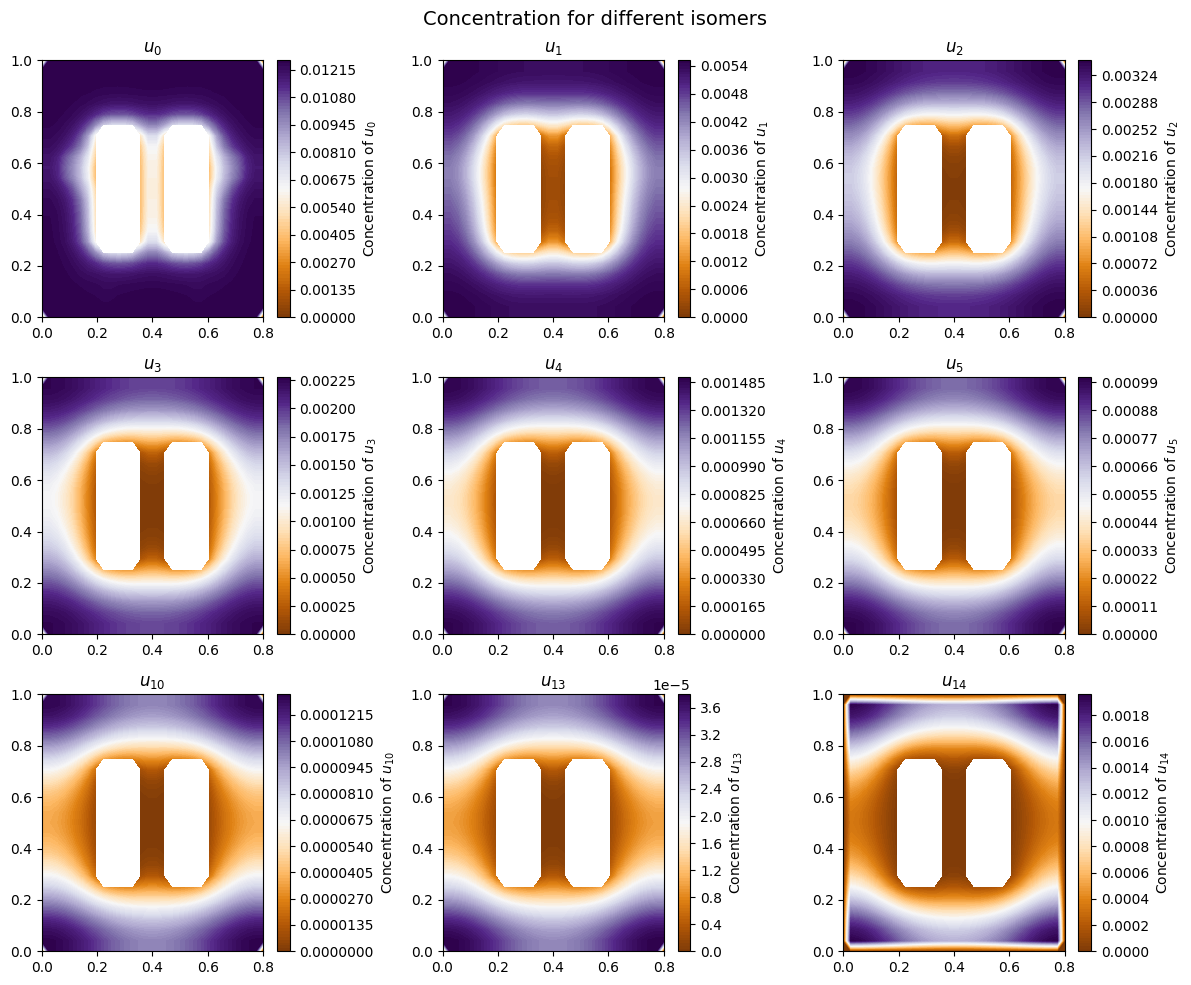

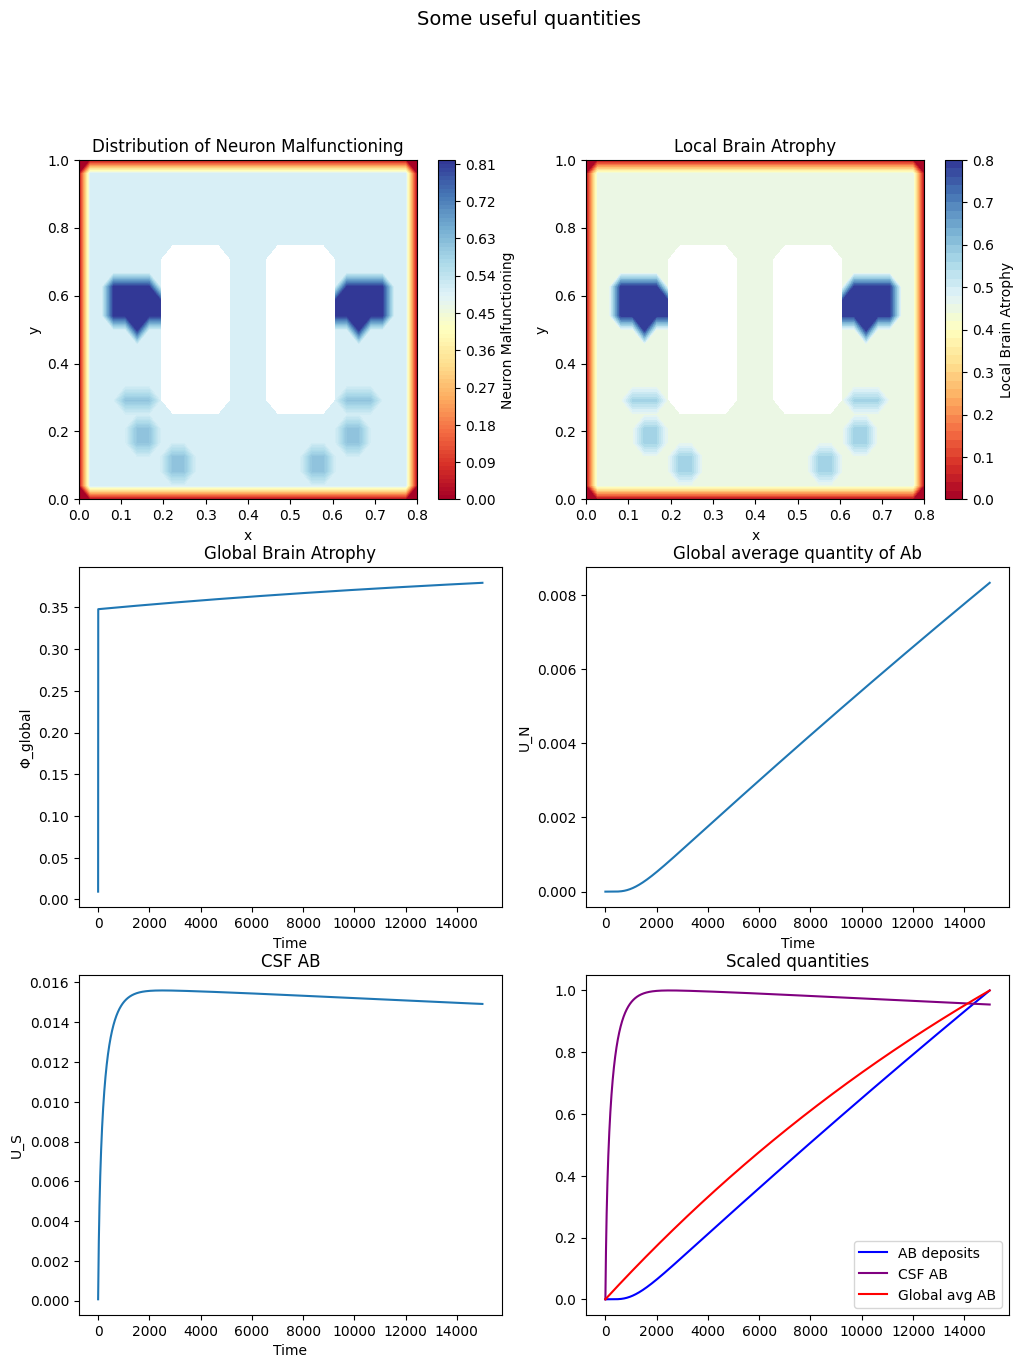

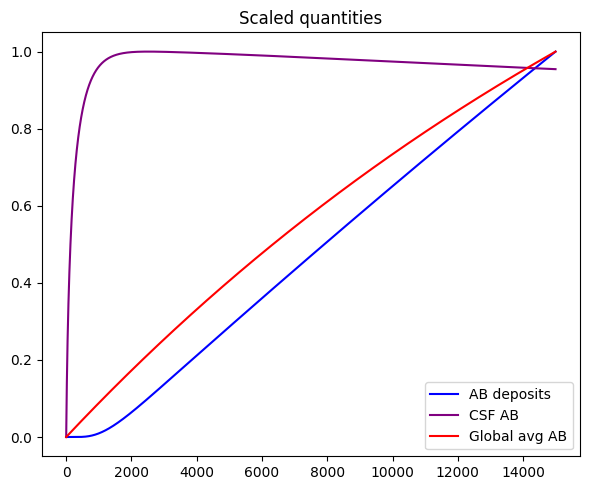

<Figure size 640x480 with 0 Axes>

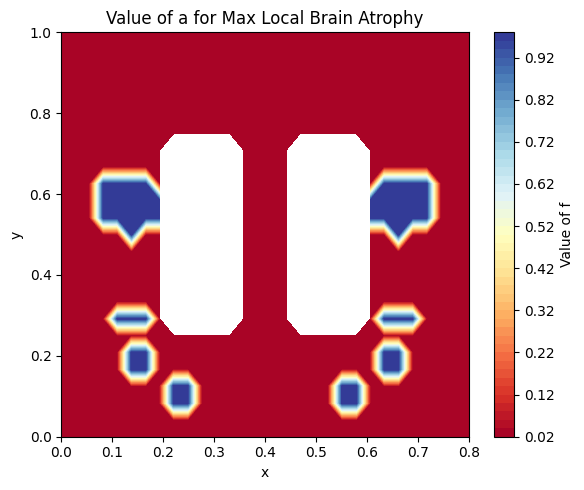

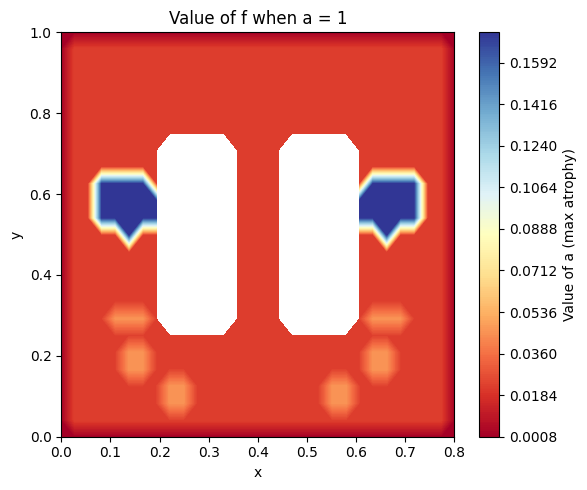

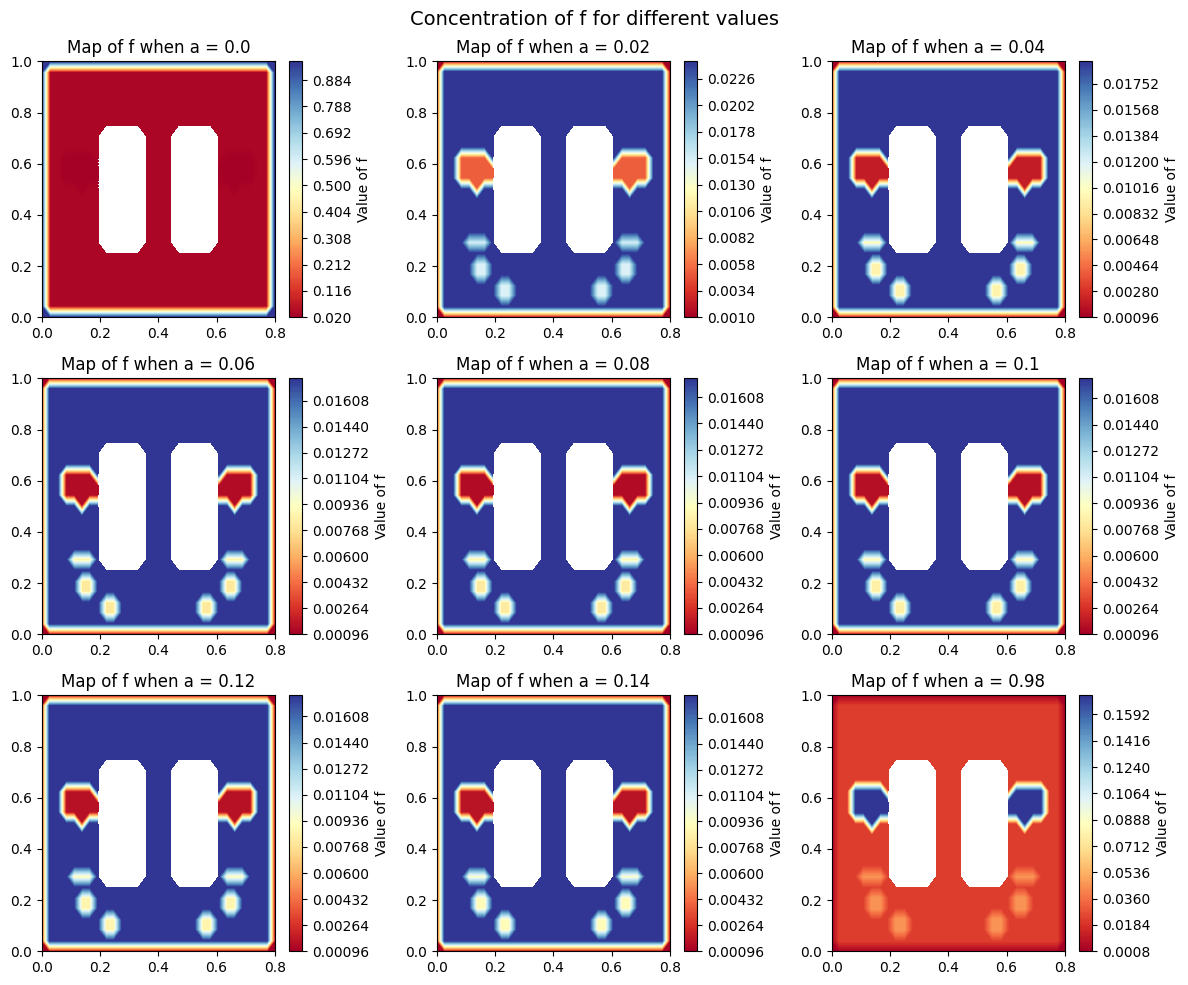

In [ ]:
plot_risultati(u1, malfunc_dist1, phi1, phi_glob1, U_N1, U_S = U_S1, f = f1,
               Na = 50, isomer_steps = [0, 1, 2, 3, 4, 5, 10, 13, 14], plot = True)